In [94]:
# Lab Assignment 04
# The objective of this lab assignment is to cluster customers of a telephone company (data_lab_04.csv)
# using different clustering techniques and evaluate the clusters found.

In [95]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [96]:
# load the dataset and display the first five rows
data = pd.read_csv('data_lab_04.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [97]:
# TASK 01 create a new numerical attribute named 'Total charge' that contains the sum of
# the attributes 'Total day charge', 'Total eve charge', and 'Total night charge'
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']

In [98]:
# partition the dataset into attributes and true clusters (churned/non-churned)
# consider only the following attributes: 'International plan', 'Total charge', and 'Customer service calls'
X = data[['International plan', 'Total charge', 'Customer service calls']]
Y = data['Churn']

In [99]:
# TASK 02: standardize the attributes using sklearn.preprocessing.StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [100]:
# TASK 03: cluster dataset using hierarchical clustering with single (min) linkage method
# HINT: use scipy.cluster.hierarchy.linkage with single linkage as the method and
# Euclidean distance as the distance metric
clustering = linkage(X, method = 'single', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

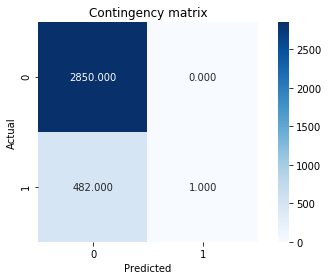

In [101]:
# TASK 04: plot contingency matrix for hierarchical clustering with single linkage method
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [102]:
# TASK 05: compute evaluation metrics for hierarchical clustering with single linkage method
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = 'euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.002937082251512217, 0.617334152617666]


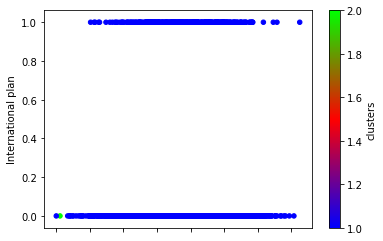

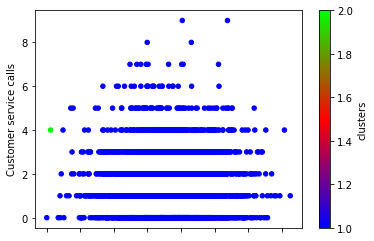

In [103]:
# plot clusters found using hierarchical clustering with single linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

In [104]:
# QUESTION 01: what can you conclude about the clusters found using hierarchical clustering
# with single linkage method from the plot and the evaluation metrics?
# ANSWER: Single linkage predicted the first attribute perfectly, but failed to predict the second attribute save for 1

In [105]:
# TASK 06: cluster dataset using hierarchical clustering with complete (max) linkage method
# HINT: use scipy.cluster.hierarchy.linkage with complete linkage as the method and
# Euclidean distance as the distance metric
clustering = linkage(X, method = 'complete', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

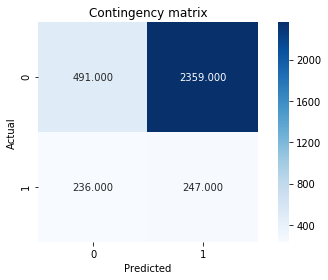

In [106]:
# TASK 07: plot contingency matrix for hierarchical clustering with complete linkage method
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [107]:
# TASK 08: compute evaluation metrics for hierarchical clustering with complete linkage method
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = 'euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.17869076326611436, 0.4753722604678654]


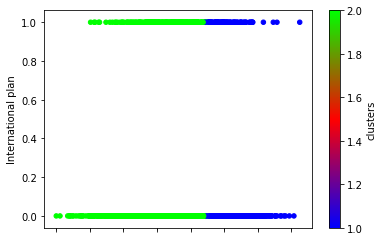

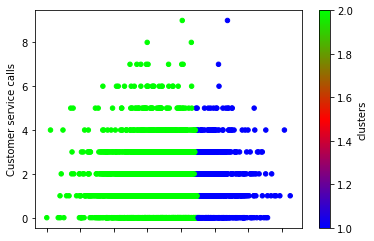

In [108]:
# plot clusters found using hierarchical clustering with complete linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

In [109]:
# QUESTION 02: what can you conclude about the clusters found using hierarchical clustering
# with complete linkage method from the plot and the evaluation metrics?
# ANSWER: We are not splitting the clusters into two. Attribute 1 is still predicted well, and attribute 2 is predicted
# better than with single linkage, but still not amazing. 

In [110]:
# TASK 09: cluster dataset using K-Means clustering
# HINT: use sklearn.cluster.KMeans with random initialization of centroids, 10 iterations,
# and parameter random_state set to 0
clustering = KMeans(n_clusters = 3, init = 'random', n_init = 10, random_state = 0).fit(X)
clusters = clustering.labels_

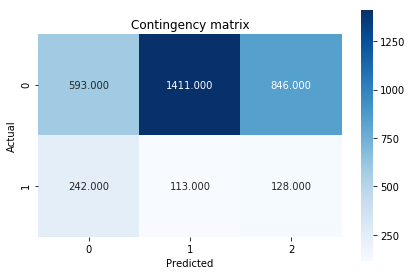

In [111]:
# TASK 10: plot contingency matrix for K-Means clustering
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [112]:
# TASK 11: compute evaluation metrics for K-Means clustering
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, data['clusters'], metric = 'euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.05052430401685383, 0.4753722604678654]


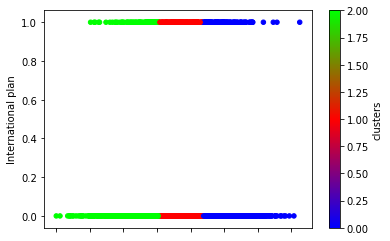

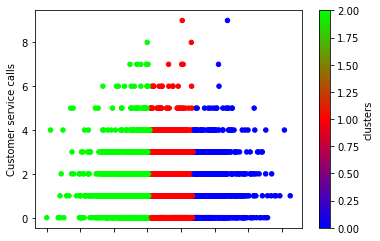

In [113]:
# plot clusters found using K-Means clustering
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

In [114]:
# QUESTION 03: what can you conclude about the clusters found using K-Means clustering
# from the plot and the evaluation metrics?
# ANSWER: It has some bad results, specifically in the blue and red, but it is still pretty good. 

In [115]:
# TASK 12: cluster dataset using DBSCAN
# HINT: use sklearn.cluster.DBSCAN with parameters Eps=2, MinPts=5,
# and Euclidean distance as the distance metric
clustering = DBSCAN(eps = 2, min_samples = 5, metric = 'euclidean').fit(X)
clusters = clustering.labels_

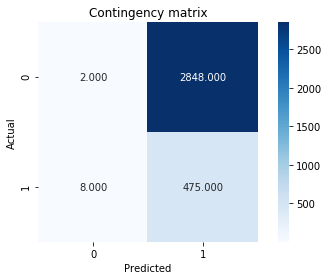

In [116]:
# TASK 13: plot contingency matrix for DBSCAN
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [117]:
# TASK 14: compute evaluation metrics for DBSCAN
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, data['clusters'], metric = 'euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.022243790488549683, 0.49518390261930134]


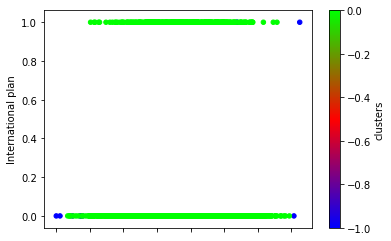

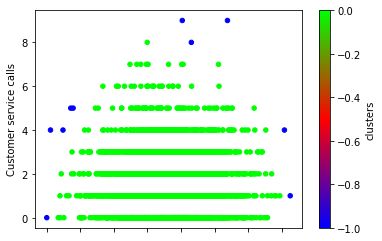

In [118]:
# plot clusters found using DBSCAN
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

In [119]:
# QUESTION 04: how many clusters were found using DBSCAN?
# ANSWER: 2

In [120]:
# QUESTION 05: what can you conclude about the clusters found using DBSCAN
# from the plot and the evaluation metrics?
# ANSWER: There is a lot of variance between the data points.

In [121]:
# QUESTION 06: which of the four clustering techniques had the best performance?
# ANSWER: hierarchical clustering with complete (max) linkage.

In [122]:
# TASK 15: compute evaluation metrics for true clusters (churned/non-churned)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = 'euclidean')
print(silhouette_coefficient)

0.5687469933426267


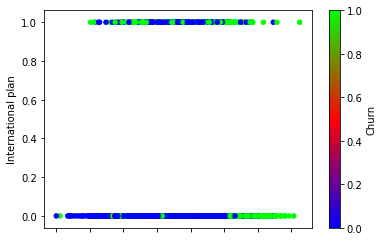

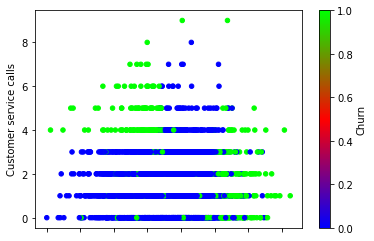

In [123]:
# plot true clusters (churned/non-churned)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'Churn', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'Churn', colormap = plt.cm.brg)

In [124]:
# QUESTION 07: what can you conclude about the data from the plot and the evaluation metrics?
# ANSWER: The amount of customer service calls is relatively low amongst customers most of the time.